In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

import re
import nltk
import gensim

In [2]:
#read in week2 twitter data or other weeks where relevant 

data = pd.read_csv("classified_week2.csv")
print(len(data))
print(data['topic'].head())


5494
0    ['text', 'prospector', 'review', 'setup', 'pay...
1    ['sometimes', 'call', 'getting', 'kicked', 'nu...
2    ['would', 'never', 'run', 'fresh', 'prospect',...
3    ['pre', 'quarantine', 'likely', 'thought', 'sp...
4    ['lot', 'begin', 'meeting', 'major', 'redraft'...
Name: topic, dtype: object


In [4]:
#code to convert df to list 

token = data['topic'].tolist()
#print(token)

def convert(lst): 
    return eval(lst)

final=[]
for i in token:
    tokenf=convert(i)
    final.append(tokenf)

print(final)

[['text', 'prospector', 'review', 'setup', 'payment', 'preference', 'text'], ['sometimes', 'call', 'getting', 'kicked', 'nut', 'twelve', 'hour', 'straight', 'one', 'day'], ['would', 'never', 'run', 'fresh', 'prospect', 'ever', 'good', 'news', 'page', 'free', 'report', 'show', 'much', 'click', 'delivery', 'fb', 'messenger'], ['pre', 'quarantine', 'likely', 'thought', 'spent', 'almost', 'workday', 'computer', 'little', 'could', 'spend', 'much', 'strategy', 'help', 'counter', 'load', 'reduce', 'digital', 'fatigue'], ['lot', 'begin', 'meeting', 'major', 'redraft', 'whatever'], ['start', 'considering', 'boost', 'mental', 'health', 'wellbeing', 'workplace', 'handy', 'guide'], ['yay', 'coming', 'city', 'would', 'great', 'still', 'online', 'option', 'available', 'know', 'shall', 'allowed', 'highrises'], ['caregiver', 'people', 'disability', 'never', 'perk'], ['feeling', 'challenge', 'backfire', 'coffee'], ['stay', 'stay', 'safe', 'setup', 'made', 'easy'], ['accelerating', 'change', 'would', 'a

In [5]:
#Code to covert docs to vec
def docs2vecs(docs, dictionary):
    vecs1 = [dictionary.doc2bow(doc) for doc in docs]
    return vecs1

In [6]:
#create dictionary and vectors for documents

tweet_dictionary = gensim.corpora.Dictionary(final)
tweet_vecs = docs2vecs(final, tweet_dictionary)

print(tweet_dictionary)
print(tweet_vecs[0])

Dictionary(9462 unique tokens: ['payment', 'preference', 'prospector', 'review', 'setup']...)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2)]


In [7]:
#save dictionary
tweet_dictionary.save('topicwk2_dict')

# LDA GenSim 

In [28]:
#generic model

tweet_lda = gensim.models.ldamodel.LdaModel(corpus=tweet_vecs, id2word=tweet_dictionary, num_topics=7)

In [29]:
#show topics

topics = tweet_lda.show_topics(7, 15)

for i in range(0, 7):
    print(topics[i])

(0, '0.010*"new" + 0.009*"day" + 0.008*"go" + 0.007*"much" + 0.006*"keep" + 0.006*"help" + 0.006*"great" + 0.005*"employee" + 0.005*"article" + 0.005*"company" + 0.005*"everyone" + 0.004*"weekend" + 0.004*"desk" + 0.004*"way" + 0.004*"call"')
(1, '0.013*"morning" + 0.009*"team" + 0.009*"good" + 0.008*"meeting" + 0.007*"let" + 0.007*"new" + 0.005*"one" + 0.005*"u" + 0.005*"help" + 0.005*"virtual" + 0.005*"thing" + 0.005*"way" + 0.005*"put" + 0.004*"feel" + 0.004*"people"')
(2, '0.008*"done" + 0.008*"good" + 0.007*"one" + 0.006*"since" + 0.006*"best" + 0.005*"love" + 0.005*"think" + 0.005*"could" + 0.005*"new" + 0.004*"got" + 0.004*"way" + 0.004*"taking" + 0.004*"desk" + 0.004*"current" + 0.004*"avoid"')
(3, '0.008*"thing" + 0.008*"month" + 0.006*"zoom" + 0.006*"team" + 0.006*"meeting" + 0.005*"colleague" + 0.005*"deal" + 0.005*"video" + 0.005*"better" + 0.005*"u" + 0.005*"much" + 0.005*"still" + 0.005*"check" + 0.005*"tip" + 0.004*"would"')
(4, '0.013*"one" + 0.008*"call" + 0.007*"life"

In [30]:
#visualisation - 7 topics - chosen number

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
visual= pyLDAvis.gensim.prepare(tweet_lda, tweet_vecs, tweet_dictionary)
pyLDAvis.save_html(visual, "topic_viz_lda_week2.html")

C:\Users\User\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [42]:
#compute perplexity 

perplex = tweet_lda.log_perplexity(tweet_vecs, total_docs=None)


In [43]:
print('Perplexity for LDA:',perplex)

Perplexity for LDA: -8.718355559746124


In [41]:
#compute final coherenece score
from gensim.models import CoherenceModel
coherencemodel = CoherenceModel(model=tweet_lda, texts=final, dictionary=tweet_dictionary, coherence='c_v')
print('Perplexity for LDA:',str(coherencemodel.get_coherence()))


Perplexity for LDA: 0.27065384629914596


### choose optimal number of K

In [8]:
#choose optimal number of K


import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(4, 22, 2):
    tweet_lda = gensim.models.ldamodel.LdaModel(corpus=tweet_vecs, id2word=tweet_dictionary, num_topics=num_topics)
    #tweet_lda_m= gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=tweet_vecs, num_topics=no_topics, id2word=tweet_dictionary)
    coherencemodel = CoherenceModel(model=tweet_lda, texts=final, dictionary=tweet_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(tweet_lda)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-07-17 20:53:27.882906
#Topics: 4 Score: 0.20575532770891966
#Topics: 6 Score: 0.2554943713131376
#Topics: 8 Score: 0.3393765212403359
#Topics: 10 Score: 0.3107614279487153
#Topics: 12 Score: 0.3001651127050448
#Topics: 14 Score: 0.3423358923729997
#Topics: 16 Score: 0.33571466306053077
#Topics: 18 Score: 0.37231983190820483
#Topics: 20 Score: 0.38207672317655283
2020-07-17 20:57:28.904390


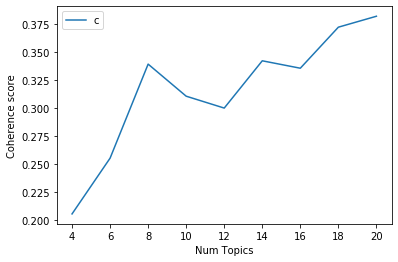

In [9]:
#print coherence graph

limit=22; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [35]:
#Code to save the document topic probabilities (theta)

mixture = [dict(tweet_lda[x]) for x in tweet_vecs]
pd.DataFrame(mixture).to_csv("doc_topic_mixture_week2lda.csv")

In [34]:
# Code to save top 10 words for each topic (beta)

top_words_per_topic = []
for t in range(tweet_lda.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in tweet_lda.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_week2lda.csv")

In [36]:
#Find most dominant topic and save

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=tweet_lda, corpus=tweet_vecs, data=final)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
pd.set_option('display.max_colwidth', -1)
df_dominant_topic.head(20)




,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.5543,"one, love, check, everyone, covid, think, help, forecast, always, good","[text, prospector, review, setup, payment, preference, text]"
1,1,4.0,0.3940,"one, call, life, never, help, got, people, much, good, u","[sometimes, call, getting, kicked, nut, twelve, hour, straight, one, day]"
2,2,4.0,0.9523,"one, call, life, never, help, got, people, much, good, u","[would, never, run, fresh, prospect, ever, good, news, page, free, report, show, much, click, delivery, fb, messenger]"
3,3,3.0,0.9570,"thing, month, zoom, team, meeting, colleague, deal, video, better, u","[pre, quarantine, likely, thought, spent, almost, workday, computer, little, could, spend, much, strategy, help, counter, load, reduce, digital, fatigue]"
4,4,1.0,0.8768,"morning, team, good, meeting, let, new, one, u, help, virtual","[lot, begin, meeting, major, redraft, whatever]"
5,5,3.0,0.7205,"thing, month, zoom, team, meeting, colleague, deal, video, better, u","[start, considering, boost, mental, health, wellbeing, workplace, handy, guide]"
6,6,4.0,0.8947,"one, call, life, never, help, got, people, much, good, u","[yay, coming, city, would, great, still, online, option, available, know, shall, allowed, highrises]"
7,7,6.0,0.8567,"help, company, people, tip, would, new, one, team, go, remotely","[caregiver, people, disability, never, perk]"
8,8,0.0,0.5835,"new, day, go, much, keep, help, great, employee, article, company","[feeling, challenge, backfire, coffee]"
9,9,0.0,0.8770,"new, day, go, much, keep, help, great, employee, article, company","[stay, stay, safe, setup, made, easy]"


In [38]:
#combine domminant topic with raw data

final_df = data.join(df_dominant_topic)
print(final_df.head())

final_df.to_csv('week2_topic.csv',index=False)

   week_num  day_num  row_num        userid        username  \
0  2         1        22887    1.829232e+07  WhoisRhandell    
1  2         1        22889    4.688155e+07  elicash_lowkey   
2  2         1        22900    8.450380e+17  davidndana       
3  2         1        22902    1.592805e+09  PacWealth        
4  2         1        22903    5.552666e+07  maiphay          

                                                                                                                                             acctdesc  \
0  Get Paid to Return Phone Calls! Dial 614-591-7006 if you're (HUNGRY) and hear this powerful 2 minute recording! 📲                                    
1  Just an average bald white guy who can also rap pretty well for some reason....no, seriously.                                                        
2  Dedicated to empowering YOUR Home Business success. 🙌Learn what your upline won't tell you about marketing on facebook 👇👇https://t.co/G32JdQ1pSn 😀   
3  Direct

#### save final model

In [52]:
#Save a model to disk, or reload a pre-trained model
from gensim.test.utils import datapath

filename='lda_gen_week2'
lda_sav=tweet_lda 
lda_sav.save(filename)

lda_disk=gensim.models.LdaModel.load("lda_gen_week2")

# LDA Mallet

In [14]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'}) #update this path

no_topics=12
no_iter=1000 

mallet_path = r'C:\mallet-2.0.8\bin\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tweet_vecs, iterations=no_iter, num_topics=no_topics, id2word=tweet_dictionary)


perplexity from prompt page is -8.29755

In [15]:
# Show Topics


vecTop= ldamallet.show_topics(num_topics=12)
for i in range(0, 12):
    print(vecTop[i])

(0, '0.052*"call" + 0.026*"kid" + 0.021*"colleague" + 0.021*"stay" + 0.021*"safe" + 0.020*"hour" + 0.017*"coming" + 0.014*"focus" + 0.014*"dog" + 0.011*"hear"')
(1, '0.068*"people" + 0.039*"company" + 0.033*"lockdown" + 0.022*"service" + 0.019*"big" + 0.019*"live" + 0.014*"support" + 0.013*"solution" + 0.013*"essential" + 0.012*"internet"')
(2, '0.029*"open" + 0.029*"place" + 0.024*"set" + 0.022*"feeling" + 0.022*"view" + 0.021*"avoid" + 0.020*"virtual" + 0.018*"family" + 0.017*"mind" + 0.013*"lost"')
(3, '0.052*"meeting" + 0.038*"zoom" + 0.028*"client" + 0.019*"top" + 0.018*"fun" + 0.017*"stop" + 0.016*"call" + 0.014*"hand" + 0.013*"summer" + 0.013*"game"')
(4, '0.039*"tip" + 0.038*"covid" + 0.036*"life" + 0.036*"employee" + 0.021*"hard" + 0.021*"thought" + 0.018*"hope" + 0.016*"important" + 0.016*"screen" + 0.015*"time"')
(5, '0.057*"thing" + 0.036*"month" + 0.026*"year" + 0.019*"job" + 0.018*"coffee" + 0.018*"week" + 0.016*"friend" + 0.013*"miss" + 0.012*"tomorrow" + 0.012*"ive"')
(

### choose optimal k

In [12]:
#choose optimal number of K

# Can take a long time to run. In this case we are going to  k_max=30
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(4, 22, 2):
    #tweet_lda = gensim.models.ldamodel.LdaModel(corpus=tweet_vecs, id2word=tweet_dictionary, num_topics=num_topics)
    tweet_lda_m= gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=tweet_vecs, num_topics=no_topics, id2word=tweet_dictionary)
    coherencemodel = CoherenceModel(model=tweet_lda_m, texts=final, dictionary=tweet_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(tweet_lda_m)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-07-17 21:02:01.750978
#Topics: 4 Score: 0.43960571228174317
#Topics: 6 Score: 0.42529266464442306
#Topics: 8 Score: 0.4282253187274598
#Topics: 10 Score: 0.42220060155980516
#Topics: 12 Score: 0.44085380849630995
#Topics: 14 Score: 0.45654525453949363
#Topics: 16 Score: 0.4159648497118427
#Topics: 18 Score: 0.4268042318750689
#Topics: 20 Score: 0.42484566925094297
2020-07-17 21:06:39.588121


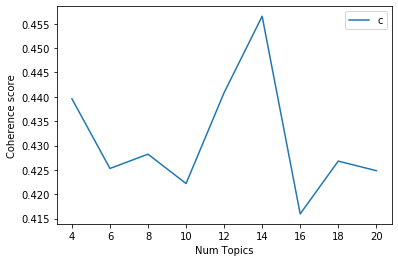

In [13]:
#print coherence graph

limit=22; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [27]:
#Find most dominant topic 

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=tweet_vecs, data=final)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.1406,"make, free, online, business, start, money, re...","[side, hustle, sunday, looking, new, way, make..."
1,1,14.0,0.1472,"check, earn, product, link, find, end, daily, ...","[earn, cash, back, signing, freedom, credit, c..."
2,2,19.0,0.0806,"business, learn, hour, sale, internet, step, t...","[online, sale, pajama, surged, april, march, p..."
3,3,8.0,0.0984,"call, meeting, zoom, email, lot, started, brea...","[text, prospector, review, setup, payment, pre..."
4,4,11.0,0.1271,"time, service, customer, part, benefit, based,...","[ten, common, reason, consider, starting, home..."
5,5,18.0,0.0776,"day, week, live, good, morning, happy, im, fee...","[sometimes, call, like, getting, kicked, nut, ..."
6,6,7.0,0.0929,"amp, world, network, place, training, open, he...","[unemployment, benefit, available, want, self,..."
7,7,4.0,0.0833,"employee, company, productivity, data, digital...","[protect, user, data, matter]"
8,8,19.0,0.0738,"business, learn, hour, sale, internet, step, t...","[farewell, bc, welcome, ad, bartleby, working,..."
9,9,14.0,0.1283,"check, earn, product, link, find, end, daily, ...","[hi, k, check, new, product, exclusive, new, c..."


# sklearn

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
tweet_docs_joined = [" ".join(x) for x in final]  #joined to fit vectorizerfinal
#print(tweet_docs_joined)

In [18]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
sk_tweet_vecs = vectorizer.fit_transform(tweet_docs_joined)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [40]:
# Build LDA Model
sk_tweet_lda = LatentDirichletAllocation(n_components=12,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = sk_tweet_lda.fit_transform(sk_tweet_vecs)

In [42]:
# write a function to display the topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(sk_tweet_lda, feature_names, 15)

Topic 0:
know strategy register little thought detail could setup computer view quick resource content whilst student
Topic 1:
day make today free covid video business look like start work time use ready post
Topic 2:
new remote job work even come environment product also social end easy home made get
Topic 3:
get online good world business make service need way customer marketing free money amp click
Topic 4:
home working work employee team tip time remote office help people learn stay keep way
Topic 5:
gt contact find visit today center save time laptop different stop please weekend bit available
Topic 6:
virtual meeting call day one lockdown zoom making desk sure staff morning question collaboration face
Topic 7:
thing amp see year week well link best last share take follow great next experience
Topic 8:
live set really latest work going earn team guide find help might success hiring project
Topic 9:
office back one still great company may space happy article home workforce survey l

### choose optimal k

In [20]:

import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(4,22, 2):
    sk_tweet_lda_x = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = -1)
    sk_tweet_lda_x.fit_transform(sk_tweet_vecs)
    model_topics.append(num_topics)
    model_list.append(sk_tweet_lda_x)
    perplexity_values.append(sk_tweet_lda_x.perplexity(sk_tweet_vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(sk_tweet_lda_x.perplexity(sk_tweet_vecs)))

print(datetime.datetime.now())

2020-07-17 21:10:38.704415
#Topics: 4, Score: 4357.672176040741
#Topics: 6, Score: 4818.0836286888725
#Topics: 8, Score: 5196.1228013232
#Topics: 10, Score: 5392.584133877441
#Topics: 12, Score: 5645.148969161959
#Topics: 14, Score: 5899.029022162014
#Topics: 16, Score: 6001.817380855156
#Topics: 18, Score: 6283.805864695886
#Topics: 20, Score: 6556.802924290993
2020-07-17 21:20:05.730756


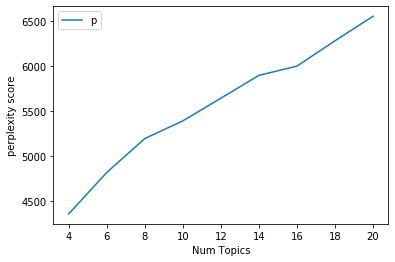

In [22]:
# Show graph

import matplotlib.pyplot as plt

limit=22; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [39]:
# Create Document - Topic Matrix
lda_output = model_list[2].transform(sk_tweet_vecs)

# column names
topicnames = ["Topic" + str(i) for i in range(model_list[2].n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(final))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
num_doc_to_show = 10  # change this to display the number of documents shown below
df_document_topics = df_document_topic.head(num_doc_to_show).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,dominant_topic
Doc0,0.00397,0.06507,0.00397,0.00397,0.7841,0.06661,0.05247,0.00397,0.00397,0.00397,0.00397,0.00397,4
Doc1,0.88542,0.01042,0.01042,0.01042,0.01042,0.01042,0.01042,0.01042,0.01042,0.01042,0.01042,0.01042,0
Doc2,0.00694,0.00694,0.00694,0.00694,0.09028,0.00694,0.84028,0.00694,0.00694,0.00694,0.00694,0.00694,6
Doc3,0.00926,0.00926,0.78896,0.00926,0.00926,0.00926,0.11845,0.00926,0.00926,0.00926,0.00926,0.00926,2
Doc4,0.00758,0.00758,0.00758,0.00758,0.00758,0.00758,0.82576,0.00758,0.09848,0.00758,0.00758,0.00758,6
Doc5,0.00641,0.00641,0.00641,0.00641,0.00641,0.00641,0.00641,0.07868,0.00641,0.00641,0.85721,0.00641,10
Doc6,0.00641,0.08333,0.00641,0.00641,0.00641,0.00641,0.00641,0.00641,0.00641,0.00641,0.85256,0.00641,10
Doc7,0.01667,0.01667,0.81666,0.01667,0.01667,0.01667,0.01667,0.01667,0.01667,0.01667,0.01667,0.01667,2
Doc8,0.00758,0.43032,0.00758,0.00758,0.00758,0.49392,0.00758,0.00758,0.00758,0.00758,0.00758,0.00758,5
Doc9,0.00926,0.78336,0.00926,0.12405,0.00926,0.00926,0.00926,0.00926,0.00926,0.00926,0.00926,0.00926,1
